In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as s

## Let's imagine a scenario where the data of **Number of students getting placed per day** in a university for the past 14 Years or 14 x 300 = 4200 days, is collected and the data looks like the following:

In [38]:
placements_per_day = np.random.poisson(lam=5,size=4200)

In [39]:
print(placements_per_day)

[5 7 3 ... 2 3 3]


### Let's compute the unique values in this data. 

In [40]:
X = np.unique(placements_per_day)
print(X)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


### Let's compute the relative frequency of these different values in the dataset. 

In [41]:
relative_frequency = list()

for x in X:
    relative_frequency.append(np.count_nonzero(placements_per_day == x)/placements_per_day.shape[0])

print(relative_frequency)

[np.float64(0.007142857142857143), np.float64(0.03190476190476191), np.float64(0.08761904761904762), np.float64(0.15095238095238095), np.float64(0.16690476190476192), np.float64(0.17452380952380953), np.float64(0.14809523809523809), np.float64(0.09452380952380952), np.float64(0.06857142857142857), np.float64(0.04023809523809524), np.float64(0.017142857142857144), np.float64(0.007142857142857143), np.float64(0.002619047619047619), np.float64(0.002142857142857143), np.float64(0.0004761904761904762)]


### Let's create a table of relative frequency of these different values:

$$
\Large
\begin{array}{|c|c|}
\hline
\textbf{Placements Per Day (k)} & \textbf{Relative Frequency, RF(k)}\\
\hline
0 & 0.0071 \\
1 & 0.0319 \\
2 & 0.0876 \\
3 & 0.1509 \\
4 & 0.1669 \\
5 & 0.1745 \\
6 & 0.1480 \\
7 & 0.0945 \\
8 & 0.0685 \\
9 & 0.0402 \\
10 & 0.0171 \\
11 & 0.0071 \\
12 & 0.0026 \\
13 & 0.0021 \\
14 & 0.0004 \\
\hline
\end{array}
$$

### If we plot the this data, then we get:

<BarContainer object of 15 artists>

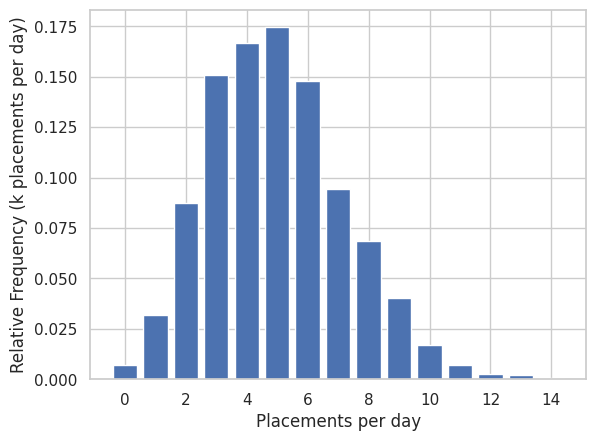

In [57]:
plt.xlabel("Placements per day")
plt.ylabel("Relative Frequency (k placements per day)")
plt.bar(np.unique(placements_per_day),relative_frequency)

## The distribution looks very much like a Binomial Distribution and similar to the scenario of Binomial Distribution of $N=14$ students sitting for a placement drive and we have $k$ $(0 \le k \le N)$ out of $N=14$ students getting placed in a drive and remaining $(N-k)$ students not getting placed.

# **But does it really ????**

### In order to verify this, let's compute the probabilities of $k$ students getting placed out of $N=14$ students, using the PDF of the Binomial Distribution:


$$
\Large
P(k/14) = 14_{C_k}\cdot{(p)^k}\cdot{(1-p)^{(14-k)}}
$$

## Where $p$ and $(1-p)$ is the **probability of getting a single student getting placed and not placed, respectively.**

### But the problem is that how to determine the value of $p$ ???

## If the discussion of Binomial Distribution is recalled then we already know that the value having highest probability, is the mean of the Binomial Distribution, therefore if we are assuming that the above distribution looks like Binomial Distribution then, $\mu = (N\cdot{p}) = 5$, therefore: 

##
$$
\Large
\mu = (N\cdot{p}) = 5 \\
(N\cdot{p}) = (14\cdot{p}) = 5 \\
p = \left(\frac{5}{14}\right)
$$

### Therefore, the probabilities will be computed using the PDF of Binomial Distribution as:

$$
\Large
P(k/14) = 14_{C_k}\cdot{\left(\frac{5}{14}\right)^k}\cdot{\left(1-\frac{5}{14}\right)^{(14-k)}}
$$

### So, let's compute the probabilities now. 

In [43]:
p_k_out_of_N = s.binom.pmf(np.unique(placements_per_day),14,5/14)

In [44]:
p_k_out_of_N

array([2.05874536e-03, 1.60124639e-02, 5.78227863e-02, 1.28495081e-01,
       1.96311929e-01, 2.18124365e-01, 1.81770304e-01, 1.15409717e-01,
       5.61019458e-02, 2.07784984e-02, 5.77180512e-03, 1.16602124e-03,
       1.61947394e-04, 1.38416576e-05, 5.49272127e-07])

### Now, let's augment these probabilities in the table above to compare that whether these probabilities are coming out to be same as that of the probabilities mentioned above in the table. 

$$
\Large
\begin{array}{|c|c|c|}
\hline
\textbf{Placements Per Day (k)} & \textbf{RF(k)} & \textbf{P(k/14)}\\
\hline
0 & 0.0071 & 0.002058\\
1 & 0.0319 & 0.01601\\
2 & 0.0876 & 0.05782\\
3 & 0.1509 & 0.1284\\
4 & 0.1669 & 0.1963\\
5 & 0.1745 & 0.2181\\
6 & 0.1480 & 0.1817\\
7 & 0.0945 & 0.1154\\
8 & 0.0685 & 0.056\\
9 & 0.0402 & 0.02077\\
10 & 0.0171 & 0.00577\\
11 & 0.0071 & 0.00116\\
12 & 0.0026 & 0.0001619\\
13 & 0.0021 & 0.00001384\\
14 & 0.0004 & 0.0000005492\\
\hline
\end{array}
$$

## It can be clearly observed that **there is a huge difference between observed probabilities, $P(X=k)$ and Binomial Probabilities, $P(k/14)$**. 

## And, this difference can be observed in the following plot more visibly. 

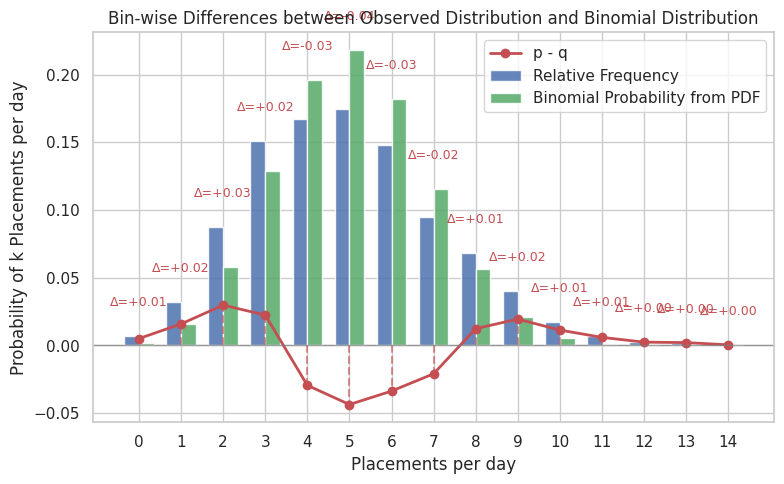

In [62]:
categories = np.unique(placements_per_day)  # categorical bins [web:1][web:2]
p = np.array(relative_frequency)   # distribution 1 probabilities (sum to 1) [web:3]
q = p_k_out_of_N   # distribution 2 probabilities (sum to 1) [web:3]

# Compute differences (p - q)
diff = p - q  # signed bin-wise difference to visualize fit mismatch [web:6][web:11]

sns.set(style="whitegrid")  # clean categorical style [web:1]

x = np.arange(len(categories))
w = 0.35  # bar width [web:11]

fig, ax = plt.subplots(figsize=(8, 5))

# Side-by-side bars using matplotlib.pyplot.bar
ax.bar(x - w/2, p, width=w, label="Relative Frequency", color='#4C72B0', alpha=0.85)  # grouped bars [web:11]
ax.bar(x + w/2, q, width=w, label="Binomial Probability from PDF", color='#55A868', alpha=0.85)  # grouped bars [web:11]

# Difference markers (signed), to show goodness-of-fit at each category
ax.plot(x, diff, color='#C44E52', marker='o', linewidth=2, label='p - q')  # overlay difference [web:6][web:11]
for xi, d in zip(x, diff):
    ax.vlines(xi, 0, d, color='#C44E52', linestyles='dashed', alpha=0.6)  # vertical guide to show magnitude [web:6]

# Zero line for reference
ax.axhline(0, color='gray', linewidth=1, alpha=0.7)  # baseline for signed differences [web:6]

# Labels and ticks
ax.set_xticks(x)
ax.set_xticklabels(categories)  # categorical labels [web:1][web:2]
ax.set_xlabel("Placements per day")
ax.set_ylabel("Probability of k Placements per day")  # bar heights represent probabilities [web:3]
ax.set_title("Bin-wise Differences between Observed Distribution and Binomial Distribution")  # grouped comparison [web:8]
ax.legend()

# Optional: annotate absolute differences above bars
for xi, pi, qi in zip(x, p, q):
    d = pi - qi
    ax.text(xi, max(pi, qi) + 0.02, f"Δ={d:+.2f}", ha='center', va='bottom', fontsize=9, color='#C44E52')  # annotate diff [web:8]

plt.tight_layout()
plt.show()

## Therefore, **the above first table of observed probabilities, is not Binomial Distribution.**

# Then, what distribution it is ???

# **It is actually Poisson Distribution.**

# It's **PDF is given as:**

$$
\Huge
\boxed{P(X=k) = \frac{e^{-\lambda} \cdot{\lambda^k}}{k!}}
$$

### Where, $\lambda = \text{Mean of the Poisson Distribution (Shape Parameter)}$

### Therefore, $\lambda=5$ in our case as it's having the highest probability. Therefore, we can say that the probability of $k$ students getting placed per day is given as:

$$
\Large
P(X=k) = \frac{e^{-5}\cdot{5^k}}{k!}
$$

### Let's compute all the probabilities for different values of number of placements per day according to the PDF of Poisson Distribution, having $\lambda=5$.

In [59]:
p_x_equals_k = s.poisson.pmf(np.arange(0,15),5)

In [60]:
p_x_equals_k

array([0.00673795, 0.03368973, 0.08422434, 0.1403739 , 0.17546737,
       0.17546737, 0.14622281, 0.10444486, 0.06527804, 0.03626558,
       0.01813279, 0.00824218, 0.00343424, 0.00132086, 0.00047174])

### Let's augment these probabilities with the table above to perform the comparison that whether these computed probabilities are matching with the observed probabilities computed from the data as relative frequencies.

$$
\large
\begin{array}{|c|c|c|c|}
\hline
\textbf{Placements Per Day (k)} & \textbf{RF} & \textbf{P(k/14)} & \textbf{P(X=k) from Poisson PDF}\\
\hline
0 & 0.0071 & 0.002058 & 0.006737\\
1 & 0.0319 & 0.01601 & 0.033\\
2 & 0.0876 & 0.05782 & 0.0842\\
3 & 0.1509 & 0.1284 & 0.1403\\
4 & 0.1669 & 0.1963 & 0.1754\\
5 & 0.1745 & 0.2181 & 0.1754\\
6 & 0.1480 & 0.1817 & 0.1462\\
7 & 0.0945 & 0.1154 & 0.1044\\
8 & 0.0685 & 0.056 & 0.0652\\
9 & 0.0402 & 0.02077 & 0.0362\\
10 & 0.0171 & 0.00577 & 0.0181\\
11 & 0.0071 & 0.00116 & 0.00824\\
12 & 0.0026 & 0.0001619 & 0.0034\\
13 & 0.0021 & 0.00001384 & 0.0013\\
14 & 0.0004 & 0.0000005492 & 0.0004\\
\hline
\end{array}
$$

## It can be clearly observed that **there is a very slight difference between observed probabilities (relative frequencies), $P(X=k)$ and Poisson Probabilities, $\text{P(X=k) from Poisson PDF}$**. 

## And, this minute slight difference can be observed in the following plot more visibly. 

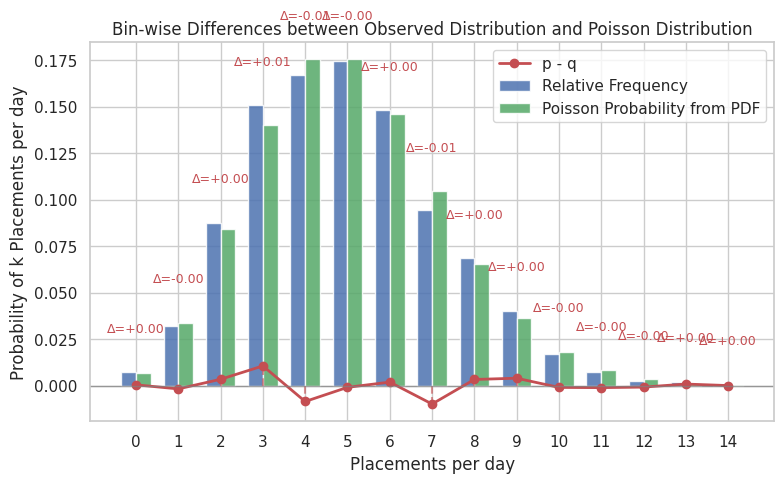

In [63]:
categories = np.unique(placements_per_day)  # categorical bins [web:1][web:2]
p = np.array(relative_frequency)   # distribution 1 probabilities (sum to 1) [web:3]
q = p_x_equals_k   # distribution 2 probabilities (sum to 1) [web:3]

# Compute differences (p - q)
diff = p - q  # signed bin-wise difference to visualize fit mismatch [web:6][web:11]

sns.set(style="whitegrid")  # clean categorical style [web:1]

x = np.arange(len(categories))
w = 0.35  # bar width [web:11]

fig, ax = plt.subplots(figsize=(8, 5))

# Side-by-side bars using matplotlib.pyplot.bar
ax.bar(x - w/2, p, width=w, label="Relative Frequency", color='#4C72B0', alpha=0.85)  # grouped bars [web:11]
ax.bar(x + w/2, q, width=w, label="Poisson Probability from PDF", color='#55A868', alpha=0.85)  # grouped bars [web:11]

# Difference markers (signed), to show goodness-of-fit at each category
ax.plot(x, diff, color='#C44E52', marker='o', linewidth=2, label='p - q')  # overlay difference [web:6][web:11]
for xi, d in zip(x, diff):
    ax.vlines(xi, 0, d, color='#C44E52', linestyles='dashed', alpha=0.6)  # vertical guide to show magnitude [web:6]

# Zero line for reference
ax.axhline(0, color='gray', linewidth=1, alpha=0.7)  # baseline for signed differences [web:6]

# Labels and ticks
ax.set_xticks(x)
ax.set_xticklabels(categories)  # categorical labels [web:1][web:2]
ax.set_xlabel("Placements per day")
ax.set_ylabel("Probability of k Placements per day")  # bar heights represent probabilities [web:3]
ax.set_title("Bin-wise Differences between Observed Distribution and Poisson Distribution")  # grouped comparison [web:8]
ax.legend()

# Optional: annotate absolute differences above bars
for xi, pi, qi in zip(x, p, q):
    d = pi - qi
    ax.text(xi, max(pi, qi) + 0.02, f"Δ={d:+.2f}", ha='center', va='bottom', fontsize=9, color='#C44E52')  # annotate diff [web:8]

plt.tight_layout()
plt.show()

# Always remember that, **no matter if the two distributions look similar but there can be a huge difference between them in terms of the probabilities of occurrence of different events**.

# And also always remember that, **Poisson Distribution will always be used to model data of Frequency of occurrence of any phenomena per unit of time (second, minute, hour, day, week, month, year) or per unit of space (mm, cm, m, km, mm $^2$, cm $^2$, m $^2$, km $^2$, mm $^3$, cm $^3$, m $^3$)**.

# In our case, it was Number of Placements **PER DAY (that is per unit of time)**.